In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from supervised_learning.regression import Regression

from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn import metrics

In [2]:
df = pd.read_csv('../data/real_estate.csv')

In [3]:
X=df.drop('Y house price of unit area', axis=1)

In [4]:
y= df['Y house price of unit area']

In [5]:
X.shape, y.shape

((414, 7), (414,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# 只取X2 house age这一列
X_train = X_train['X2 house age']
X_test = X_test['X2 house age']
# to numpy
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((289, 1), (125, 1), (289,), (125,))

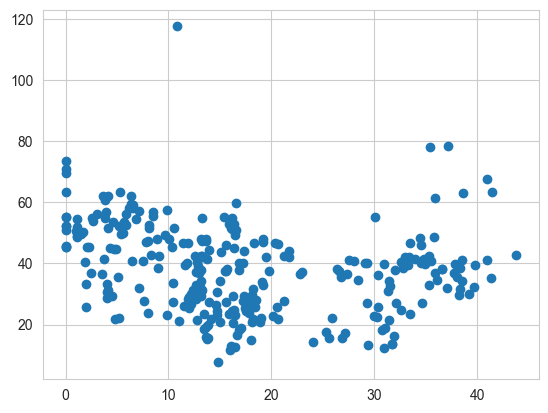

In [8]:
# print a chart of the X_train and y_train
plt.scatter(X_train, y_train)
plt.show()

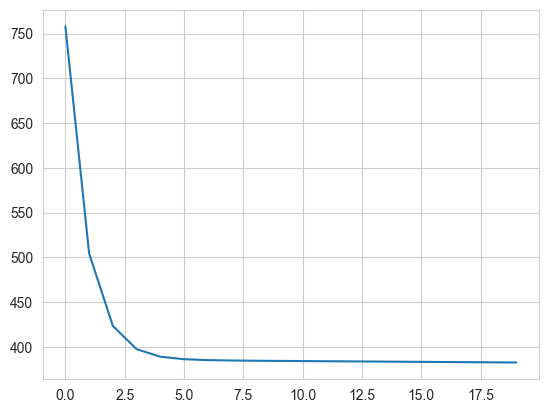

In [10]:
# 这里我们认为，房龄越大，房价越低，应该存在线性回归关系
# 所以我们选择一个线性回归模型

model = Regression(20,0.001)
model.initialize_weights_and_bias(1)
# X_train = X_train.reshape(-1,1)
# X_train.shape
# model.w.shape, X_train.shape, y_train.shape
model.fit(X_train, y_train)
# 看一下training_errors
plt.plot(model.training_errors)

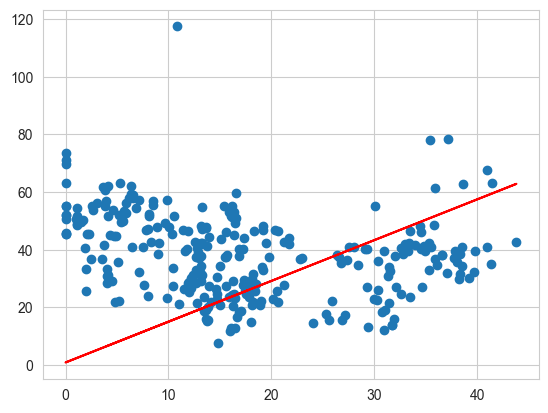

0.8382241527005443

In [16]:
# 最后在plt上，将线性回归的结果画出来, 包括model.w[0]和model.b
plt.scatter(X_train, y_train)
plt.plot(X_train, model.w[0]*X_train + model.b, 'r')
plt.show()
model.b
